In [2]:
import numpy as np
import scipy.sparse as sp
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

## Through specifying a single heatmap number

In [1]:
real_folder = '/tank/projects/neuralcachesim/sparse-matrices/SPEC/Spec-multilevel/L2-size1-1024set-8way_sparse/TEST/' #'/tank/projects/neuralcachesim/sparse-matrices/Polybench/Poly32_multiLevelCaches/config2/L2-size1-1024set-8way_sparse/TEST/'
fake_folder = '/tank/projects/neuralcachesim/sparse-matrices/fakeB/'

n_lst = ['0' , '1'] 
exp = 'SPEC_L2_ngf128ndf128_3layersd_hit' #'L2_1000bin_ngf128ndf128_3layersd_hit' #'L2_hitmap_ndf128_ngf128_3layersd'
bench = '602.gcc_s-2226B' #'gesummv.'

In [3]:
i = 1
for n in n_lst:
    full_sparse_mat = (sp.load_npz(f"/home/pranjali_jain/NCS/sparse-matrices/SPEC/SPEC189_2config/1-64-12/TEST/FULL/400.perlbench-41B/400.perlbench-41B.champsimtrace.xz.txt_{n}_A.npz")) #(sp.load_npz(real_folder + 'FULL/' + bench + '/L2-1-1024-8_'+ bench +'trace.champsim.gz.l2c.txt_'+ n +'_A.npz'))
    real_sparse_mat = (sp.load_npz(f"/home/pranjali_jain/NCS/sparse-matrices/SPEC/SPEC189_2config/1-64-12/TEST/MISS/400.perlbench-41B/400.perlbench-41B.champsimtrace.xz.txt_{n}_B.npz"))# (sp.load_npz(real_folder + 'MISS/' + bench + '/L2-1-1024-8_'+ bench +'trace.champsim.gz.l2c.txt_'+n +'_B.npz'))
    fake_sparse_mat = (sp.load_npz(f"//home/pranjali_jain/NCS/sparse-matrices/Spec-multilevel/combinedL1L2L3/L1-size1-64set-12way_sparse/TEST/MISS/400.perlbench-41B/400.perlbench-41B.champsimtrace.xz.txt_{n}_B.npz"))

    full_numpy_array = np.array(full_sparse_mat.toarray(), dtype = np.uint8)
    real_numpy_array = np.array(real_sparse_mat.toarray(), dtype = np.uint8)
    fake_numpy_array = np.array(fake_sparse_mat.toarray(), dtype = np.uint8)
    # fake_numpy_array = fake_numpy_array*5

    globals()[f'full_img_{i}'] = Image.fromarray(full_numpy_array, mode='L')
    globals()[f'real_img_{i}'] = Image.fromarray(real_numpy_array, mode='L')
    globals()[f'fake_img_{i}'] = Image.fromarray(fake_numpy_array, mode='L')

    i = i+1

In [35]:
print("fake min:", fake_sparse_mat.min(), "max:", fake_sparse_mat.max(), 
      "mean:", fake_sparse_mat.mean(), "nonzero:", fake_sparse_mat.nnz)


fake min: 0 max: 1 mean: 2.288818359375e-05 nonzero: 6


In [4]:
print(np.count_nonzero(full_numpy_array))
print(np.count_nonzero(real_numpy_array))
print(np.count_nonzero(fake_numpy_array))

11087
6
6


In [37]:
print(fake_numpy_array.shape)

(512, 512)


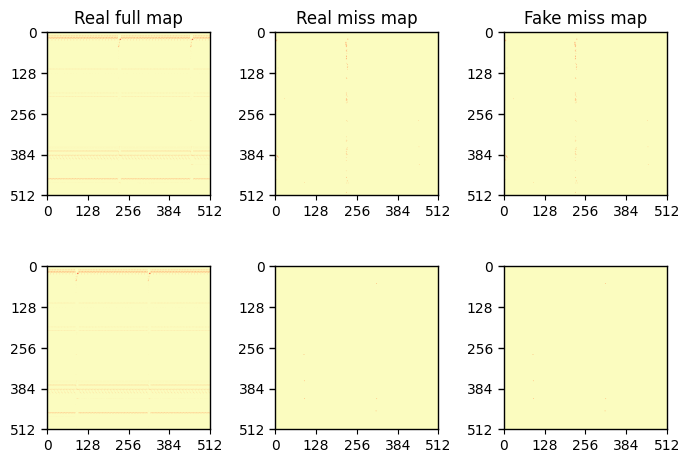

In [38]:

# plt.style.use('seaborn-white')
plt.style.use('seaborn-v0_8-deep')
colormap = 'magma_r'
# plt.style.use('default')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = ['Helvetica']
Fontsize = 10
plt.rcParams['font.size'] = Fontsize

plt.rcParams['axes.facecolor'] = 'white'  
plt.rcParams['text.color'] = 'black'  
plt.rcParams['axes.labelcolor'] = 'black'  
plt.rcParams['xtick.color'] = 'black' 
plt.rcParams['ytick.color'] = 'black'  
plt.rcParams['axes.edgecolor'] = 'black'  
plt.rcParams['axes.linewidth'] = 1.0
plt.rcParams['legend.handlelength'] = 0.7
plt.rcParams['legend.handleheight'] = 0.7
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['ytick.major.width'] = 1


figure, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(7, 5))


ax1.imshow(full_img_1, cmap=colormap)
# ax1.axis('off')
ax1.set_title('Real full map')
ax1.set_xticks(ticks = np.arange(0, 513, step=128))
ax1.set_yticks(ticks = np.arange(0, 513, step=128))


ax2.imshow(real_img_1, cmap=colormap)
# ax2.axis('off')
ax2.set_title('Real miss map')
ax2.set_xticks(ticks = np.arange(0, 513, step=128))
ax2.set_yticks(ticks = np.arange(0, 513, step=128))


ax3.imshow(fake_img_1, cmap=colormap)
# ax3.axis('off')
ax3.set_title('Fake miss map')
ax3.set_xticks(ticks = np.arange(0, 513, step=128))
ax3.set_yticks(ticks = np.arange(0, 513, step=128))


ax4.imshow(full_img_2, cmap=colormap)
# ax4.axis('off')
# ax4.set_title('Real full map')
ax4.set_xticks(ticks = np.arange(0, 513, step=128))
ax4.set_yticks(ticks = np.arange(0, 513, step=128))


ax5.imshow(real_img_2, cmap=colormap)
# ax5.axis('off')
# ax5.set_title('Real miss map')
ax5.set_xticks(ticks = np.arange(0, 513, step=128))
ax5.set_yticks(ticks = np.arange(0, 513, step=128))


ax6.imshow(fake_img_2, cmap=colormap)
# ax6.axis('off')
# ax6.set_title('Fake miss map')
ax6.set_xticks(ticks = np.arange(0, 513, step=128))
ax6.set_yticks(ticks = np.arange(0, 513, step=128))


plt.tight_layout()
# plt.savefig("Graphs/heatmap_2x3_grid", dpi=300, bbox_inches='tight')
plt.show()

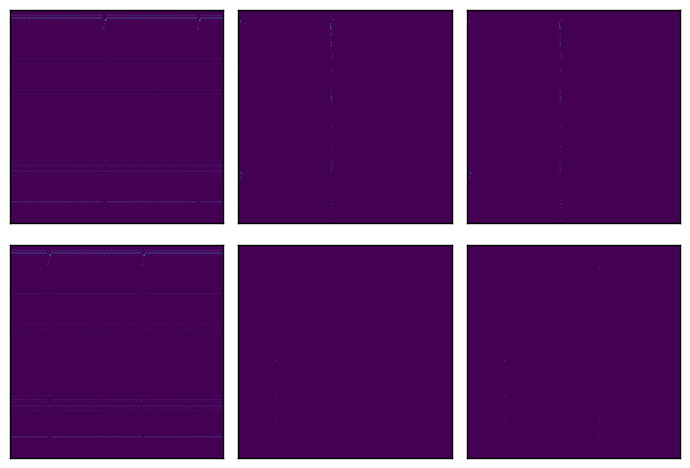

In [39]:

# plt.style.use('seaborn-white')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = ['Helvetica']
Fontsize = 10
plt.rcParams['font.size'] = Fontsize

plt.rcParams['axes.facecolor'] = 'white'  
plt.rcParams['text.color'] = 'black'  
plt.rcParams['axes.labelcolor'] = 'black'  
plt.rcParams['xtick.color'] = 'black' 
plt.rcParams['ytick.color'] = 'black'  
plt.rcParams['axes.edgecolor'] = 'black'  
plt.rcParams['axes.linewidth'] = 1.0
plt.rcParams['legend.handlelength'] = 0.7
plt.rcParams['legend.handleheight'] = 0.7
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['ytick.major.width'] = 1


figure, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(7, 5))


ax1.imshow(full_img_1)
# ax1.axis('off')
# ax1.set_title('Real full map')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.spines['top'].set_visible(True)
ax1.spines['right'].set_visible(True)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)


ax2.imshow(real_img_1)
# ax2.axis('off')
# ax2.set_title('Real miss map')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.spines['top'].set_visible(True)
ax2.spines['right'].set_visible(True)
ax2.spines['bottom'].set_visible(True)
ax2.spines['left'].set_visible(True)


ax3.imshow(fake_img_1)
# ax3.axis('off')
# ax3.set_title('Fake miss map')
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_xticklabels([])
ax3.set_yticklabels([])
ax3.spines['top'].set_visible(True)
ax3.spines['right'].set_visible(True)
ax3.spines['bottom'].set_visible(True)
ax3.spines['left'].set_visible(True)


ax4.imshow(full_img_2)
# ax4.axis('off')
# ax4.set_title('Real full map')
ax4.set_xticks([])
ax4.set_yticks([])
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.spines['top'].set_visible(True)
ax4.spines['right'].set_visible(True)
ax4.spines['bottom'].set_visible(True)
ax4.spines['left'].set_visible(True)


ax5.imshow(real_img_2)
# ax5.axis('off')
# ax5.set_title('Real miss map')
ax5.set_xticks([])
ax5.set_yticks([])
ax5.set_xticklabels([])
ax5.set_yticklabels([])
ax5.spines['top'].set_visible(True)
ax5.spines['right'].set_visible(True)
ax5.spines['bottom'].set_visible(True)
ax5.spines['left'].set_visible(True)


ax6.imshow(fake_img_2)
# ax6.axis('off')
# ax6.set_title('Fake miss map')
ax6.set_xticks([])
ax6.set_yticks([])
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.spines['top'].set_visible(True)
ax6.spines['right'].set_visible(True)
ax6.spines['bottom'].set_visible(True)
ax6.spines['left'].set_visible(True)


plt.tight_layout()
# plt.savefig("Graphs/heatmap_2x3_nogrid", dpi=300, bbox_inches='tight')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/home/dantle/CacheBox/Graphs/heatmap_2x3_overlap.png'

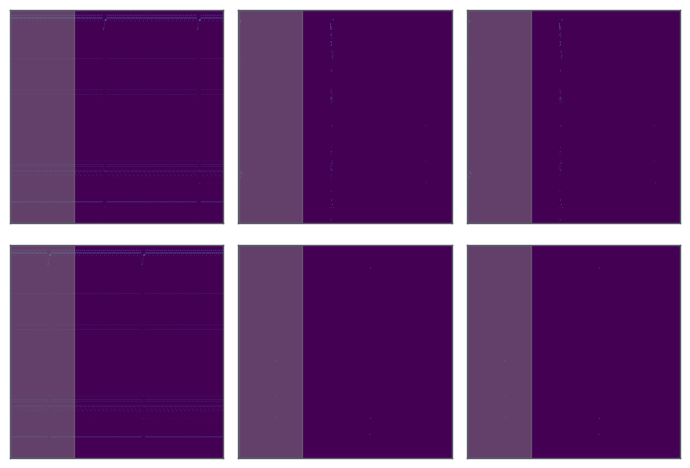

In [40]:

# plt.style.use('seaborn-white')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = ['Helvetica']
Fontsize = 10
plt.rcParams['font.size'] = Fontsize

plt.rcParams['axes.facecolor'] = 'white'  
plt.rcParams['text.color'] = 'black'  
plt.rcParams['axes.labelcolor'] = 'black'  
plt.rcParams['xtick.color'] = 'black' 
plt.rcParams['ytick.color'] = 'black'  
plt.rcParams['axes.edgecolor'] = '#555c65'  
plt.rcParams['axes.linewidth'] = 1.0
plt.rcParams['legend.handlelength'] = 0.7
plt.rcParams['legend.handleheight'] = 0.7
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['ytick.major.width'] = 1

rectangle_width = int(0.3 * full_numpy_array.shape[0])
rectangle_height = full_numpy_array.shape[1]
rectangle_coords = [0, 0, rectangle_width, rectangle_height]


rectangle1 = patches.Rectangle((rectangle_coords[0], rectangle_coords[1]),
                              rectangle_coords[2], rectangle_coords[3],
                              linewidth=1, edgecolor='gray', facecolor='gray', alpha=0.5)
rectangle2 = patches.Rectangle((rectangle_coords[0], rectangle_coords[1]),
                              rectangle_coords[2], rectangle_coords[3],
                              linewidth=1, edgecolor='gray', facecolor='gray', alpha=0.5)
rectangle3 = patches.Rectangle((rectangle_coords[0], rectangle_coords[1]),
                              rectangle_coords[2], rectangle_coords[3],
                              linewidth=1, edgecolor='gray', facecolor='gray', alpha=0.5)
rectangle4 = patches.Rectangle((rectangle_coords[0], rectangle_coords[1]),
                              rectangle_coords[2], rectangle_coords[3],
                              linewidth=1, edgecolor='gray', facecolor='gray', alpha=0.5)
rectangle5 = patches.Rectangle((rectangle_coords[0], rectangle_coords[1]),
                              rectangle_coords[2], rectangle_coords[3],
                              linewidth=1, edgecolor='gray', facecolor='gray', alpha=0.5)
rectangle6 = patches.Rectangle((rectangle_coords[0], rectangle_coords[1]),
                              rectangle_coords[2], rectangle_coords[3],
                              linewidth=1, edgecolor='gray', facecolor='gray', alpha=0.5)

figure, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(7, 5))


ax1.imshow(full_img_1)
# ax1.axis('off')
# ax1.set_title('Real full map')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.spines['top'].set_visible(True)
ax1.spines['right'].set_visible(True)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)
ax1.add_patch(rectangle1)

ax2.imshow(real_img_1)
# ax2.axis('off')
# ax2.set_title('Real miss map')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.spines['top'].set_visible(True)
ax2.spines['right'].set_visible(True)
ax2.spines['bottom'].set_visible(True)
ax2.spines['left'].set_visible(True)
ax2.add_patch(rectangle2)

ax3.imshow(fake_img_1)
# ax3.axis('off')
# ax3.set_title('Fake miss map')
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_xticklabels([])
ax3.set_yticklabels([])
ax3.spines['top'].set_visible(True)
ax3.spines['right'].set_visible(True)
ax3.spines['bottom'].set_visible(True)
ax3.spines['left'].set_visible(True)
ax3.add_patch(rectangle3)

ax4.imshow(full_img_2)
# ax4.axis('off')
# ax4.set_title('Real full map')
ax4.set_xticks([])
ax4.set_yticks([])
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.spines['top'].set_visible(True)
ax4.spines['right'].set_visible(True)
ax4.spines['bottom'].set_visible(True)
ax4.spines['left'].set_visible(True)
ax4.add_patch(rectangle4)

ax5.imshow(real_img_2)
# ax5.axis('off')
# ax5.set_title('Real miss map')
ax5.set_xticks([])
ax5.set_yticks([])
ax5.set_xticklabels([])
ax5.set_yticklabels([])
ax5.spines['top'].set_visible(True)
ax5.spines['right'].set_visible(True)
ax5.spines['bottom'].set_visible(True)
ax5.spines['left'].set_visible(True)
ax5.add_patch(rectangle5)

ax6.imshow(fake_img_2)
# ax6.axis('off')
# ax6.set_title('Fake miss map')
ax6.set_xticks([])
ax6.set_yticks([])
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.spines['top'].set_visible(True)
ax6.spines['right'].set_visible(True)
ax6.spines['bottom'].set_visible(True)
ax6.spines['left'].set_visible(True)
ax6.add_patch(rectangle6)

plt.tight_layout()
plt.savefig("Graphs/heatmap_2x3_overlap", dpi=300, bbox_inches='tight')
plt.show()

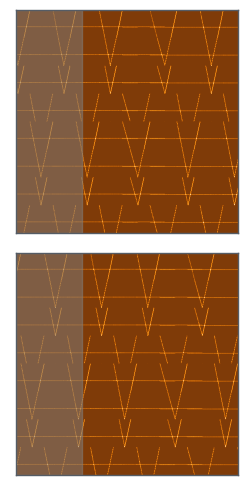

In [ ]:
colormap = 'PuOr'
plt.style.use('seaborn-v0_8-deep')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = ['Helvetica']
Fontsize = 10
plt.rcParams['font.size'] = Fontsize

plt.rcParams['axes.facecolor'] = 'white'  
plt.rcParams['text.color'] = 'black'  
plt.rcParams['axes.labelcolor'] = 'black'  
plt.rcParams['xtick.color'] = 'black' 
plt.rcParams['ytick.color'] = 'black'  
plt.rcParams['axes.edgecolor'] = '#555c65'  
plt.rcParams['axes.linewidth'] = 1.0
plt.rcParams['legend.handlelength'] = 0.7
plt.rcParams['legend.handleheight'] = 0.7
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['ytick.major.width'] = 1

rectangle_width = int(0.3 * full_numpy_array.shape[0])
rectangle_height = full_numpy_array.shape[1]
rectangle_coords = [0, 0, rectangle_width, rectangle_height]


rectangle1 = patches.Rectangle((rectangle_coords[0], rectangle_coords[1]),
                              rectangle_coords[2], rectangle_coords[3],
                              linewidth=1, edgecolor='gray', facecolor='gray', alpha=0.5)
rectangle4 = patches.Rectangle((rectangle_coords[0], rectangle_coords[1]),
                              rectangle_coords[2], rectangle_coords[3],
                              linewidth=1, edgecolor='gray', facecolor='gray', alpha=0.5)

figure, ((ax1),(ax4)) = plt.subplots(2,1, figsize=(3, 5))


ax1.imshow(full_img_1, cmap = colormap)
# ax1.axis('off')
# ax1.set_title('Real full map')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.spines['top'].set_visible(True)
ax1.spines['right'].set_visible(True)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)
ax1.add_patch(rectangle1)

ax4.imshow(full_img_2, cmap = colormap)
# ax4.axis('off')
# ax4.set_title('Real full map')
ax4.set_xticks([])
ax4.set_yticks([])
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.spines['top'].set_visible(True)
ax4.spines['right'].set_visible(True)
ax4.spines['bottom'].set_visible(True)
ax4.spines['left'].set_visible(True)
ax4.add_patch(rectangle4)



plt.tight_layout()
plt.savefig("Graphs/heatmap_2x1_realfull", dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

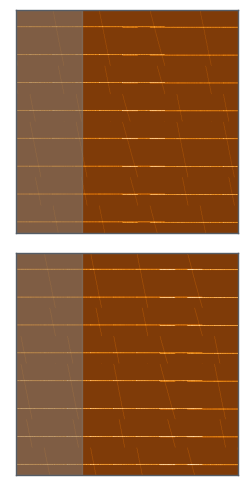

In [ ]:
colormap = 'PuOr'
plt.style.use('seaborn-v0_8-deep')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = ['Helvetica']
Fontsize = 10
plt.rcParams['font.size'] = Fontsize

plt.rcParams['axes.facecolor'] = 'white'  
plt.rcParams['text.color'] = 'black'  
plt.rcParams['axes.labelcolor'] = 'black'  
plt.rcParams['xtick.color'] = 'black' 
plt.rcParams['ytick.color'] = 'black'  
plt.rcParams['axes.edgecolor'] = '#555c65'  
plt.rcParams['axes.linewidth'] = 1.0
plt.rcParams['legend.handlelength'] = 0.7
plt.rcParams['legend.handleheight'] = 0.7
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['ytick.major.width'] = 1

rectangle_width = int(0.3 * full_numpy_array.shape[0])
rectangle_height = full_numpy_array.shape[1]
rectangle_coords = [0, 0, rectangle_width, rectangle_height]



rectangle2 = patches.Rectangle((rectangle_coords[0], rectangle_coords[1]),
                              rectangle_coords[2], rectangle_coords[3],
                              linewidth=1, edgecolor='gray', facecolor='gray', alpha=0.5)

rectangle5 = patches.Rectangle((rectangle_coords[0], rectangle_coords[1]),
                              rectangle_coords[2], rectangle_coords[3],
                              linewidth=1, edgecolor='gray', facecolor='gray', alpha=0.5)


figure, (( ax2),(ax5)) = plt.subplots(2,1, figsize=(7, 5))


ax2.imshow(real_img_1, cmap = colormap)
# ax2.axis('off')
# ax2.set_title('Real miss map')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.spines['top'].set_visible(True)
ax2.spines['right'].set_visible(True)
ax2.spines['bottom'].set_visible(True)
ax2.spines['left'].set_visible(True)
ax2.add_patch(rectangle2)


ax5.imshow(real_img_2, cmap = colormap)
# ax5.axis('off')
# ax5.set_title('Real miss map')
ax5.set_xticks([])
ax5.set_yticks([])
ax5.set_xticklabels([])
ax5.set_yticklabels([])
ax5.spines['top'].set_visible(True)
ax5.spines['right'].set_visible(True)
ax5.spines['bottom'].set_visible(True)
ax5.spines['left'].set_visible(True)
ax5.add_patch(rectangle5)


plt.tight_layout()
plt.savefig("Graphs/heatmap_2x1_realmiss", dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

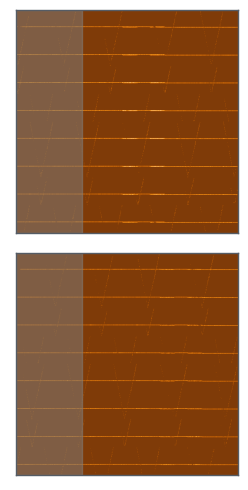

In [ ]:
colormap = 'PuOr'#'gnuplot'#'RdBu'#'BrBG'#'PRGn' #'PiYG'
plt.style.use('seaborn-v0_8-deep')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = ['Helvetica']
Fontsize = 10
plt.rcParams['font.size'] = Fontsize

plt.rcParams['axes.facecolor'] = 'white'  
plt.rcParams['text.color'] = 'black'  
plt.rcParams['axes.labelcolor'] = 'black'  
plt.rcParams['xtick.color'] = 'black' 
plt.rcParams['ytick.color'] = 'black'  
plt.rcParams['axes.edgecolor'] = '#555c65'  
plt.rcParams['axes.linewidth'] = 1.0
plt.rcParams['legend.handlelength'] = 0.7
plt.rcParams['legend.handleheight'] = 0.7
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['ytick.major.width'] = 1

rectangle_width = int(0.3 * full_numpy_array.shape[0])
rectangle_height = full_numpy_array.shape[1]
rectangle_coords = [0, 0, rectangle_width, rectangle_height]



rectangle3 = patches.Rectangle((rectangle_coords[0], rectangle_coords[1]),
                              rectangle_coords[2], rectangle_coords[3],
                              linewidth=1, edgecolor='gray', facecolor='gray', alpha=0.5)
rectangle6 = patches.Rectangle((rectangle_coords[0], rectangle_coords[1]),
                              rectangle_coords[2], rectangle_coords[3],
                              linewidth=1, edgecolor='gray', facecolor='gray', alpha=0.5)

figure, ((ax3),(ax6)) = plt.subplots(2,1, figsize=(7, 5))


ax3.imshow(fake_img_1, cmap = colormap)
# ax3.axis('off')
# ax3.set_title('Fake miss map')
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_xticklabels([])
ax3.set_yticklabels([])
ax3.spines['top'].set_visible(True)
ax3.spines['right'].set_visible(True)
ax3.spines['bottom'].set_visible(True)
ax3.spines['left'].set_visible(True)
ax3.add_patch(rectangle3)


ax6.imshow(fake_img_2, cmap = colormap)
# ax6.axis('off')
# ax6.set_title('Fake miss map')
ax6.set_xticks([])
ax6.set_yticks([])
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.spines['top'].set_visible(True)
ax6.spines['right'].set_visible(True)
ax6.spines['bottom'].set_visible(True)
ax6.spines['left'].set_visible(True)
ax6.add_patch(rectangle6)

plt.tight_layout()
plt.savefig("Graphs/heatmap_2x1_fakemiss", dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

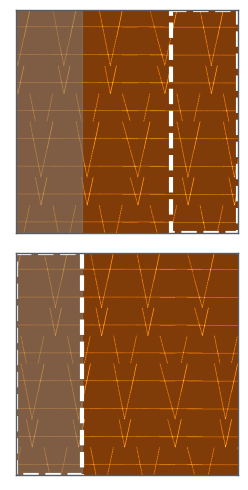

In [ ]:
colormap = 'PuOr'
plt.style.use('seaborn-v0_8-deep')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = ['Helvetica']
Fontsize = 10
plt.rcParams['font.size'] = Fontsize

plt.rcParams['axes.facecolor'] = 'white'  
plt.rcParams['text.color'] = 'black'  
plt.rcParams['axes.labelcolor'] = 'black'  
plt.rcParams['xtick.color'] = 'black' 
plt.rcParams['ytick.color'] = 'black'  
plt.rcParams['axes.edgecolor'] = '#555c65'  
plt.rcParams['axes.linewidth'] = 1.0
plt.rcParams['legend.handlelength'] = 0.7
plt.rcParams['legend.handleheight'] = 0.7
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['ytick.major.width'] = 1

rectangle_width = int(0.3 * full_numpy_array.shape[0])
rectangle_height = full_numpy_array.shape[1]
rectangle_coords = [0, 0, rectangle_width, rectangle_height]


rectangle1 = patches.Rectangle((rectangle_coords[0], rectangle_coords[1]),
                              rectangle_coords[2], rectangle_coords[3],
                              linewidth=1, edgecolor='gray', facecolor='gray', alpha=0.5)
rectangle4 = patches.Rectangle((rectangle_coords[0], rectangle_coords[1]),
                              rectangle_coords[2], rectangle_coords[3],
                              linewidth=1, edgecolor='gray', facecolor='gray', alpha=0.5)

rectangle_coords_end = [int(0.7 * full_numpy_array.shape[0]), 0, rectangle_width, rectangle_height]

rectangle1_dashed = patches.Rectangle((rectangle_coords_end[0], rectangle_coords_end[1]),
                              rectangle_coords_end[2], rectangle_coords_end[3],
                             linestyle='dashed', edgecolor='white', facecolor='none', linewidth=3)
rectangle4_dashed = patches.Rectangle((rectangle_coords[0], rectangle_coords[1]),
                              rectangle_coords[2], rectangle_coords[3],
                              linestyle='dashed', edgecolor='white', facecolor='none', linewidth=3)


figure, ((ax1),(ax4)) = plt.subplots(2,1, figsize=(3, 5))


ax1.imshow(full_img_1, cmap = colormap)
# ax1.axis('off')
# ax1.set_title('Real full map')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.spines['top'].set_visible(True)
ax1.spines['right'].set_visible(True)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)
ax1.add_patch(rectangle1)
ax1.add_patch(rectangle1_dashed)

ax4.imshow(full_img_2, cmap = colormap)
# ax4.axis('off')
# ax4.set_title('Real full map')
ax4.set_xticks([])
ax4.set_yticks([])
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.spines['top'].set_visible(True)
ax4.spines['right'].set_visible(True)
ax4.spines['bottom'].set_visible(True)
ax4.spines['left'].set_visible(True)
ax4.add_patch(rectangle4)
ax4.add_patch(rectangle4_dashed)


plt.tight_layout()
plt.savefig("Graphs/heatmap_2x1_realfull_withoverlapbox", dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

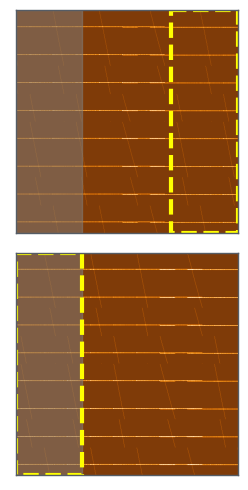

In [ ]:
colormap = 'PuOr'
plt.style.use('seaborn-v0_8-deep')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = ['Helvetica']
Fontsize = 10
plt.rcParams['font.size'] = Fontsize

plt.rcParams['axes.facecolor'] = 'white'  
plt.rcParams['text.color'] = 'black'  
plt.rcParams['axes.labelcolor'] = 'black'  
plt.rcParams['xtick.color'] = 'black' 
plt.rcParams['ytick.color'] = 'black'  
plt.rcParams['axes.edgecolor'] = '#555c65'  
plt.rcParams['axes.linewidth'] = 1.0
plt.rcParams['legend.handlelength'] = 0.7
plt.rcParams['legend.handleheight'] = 0.7
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['ytick.major.width'] = 1

rectangle_width = int(0.3 * full_numpy_array.shape[0])
rectangle_height = full_numpy_array.shape[1]
rectangle_coords = [0, 0, rectangle_width, rectangle_height]



rectangle2 = patches.Rectangle((rectangle_coords[0], rectangle_coords[1]),
                              rectangle_coords[2], rectangle_coords[3],
                              linewidth=1, edgecolor='gray', facecolor='gray', alpha=0.5)

rectangle5 = patches.Rectangle((rectangle_coords[0], rectangle_coords[1]),
                              rectangle_coords[2], rectangle_coords[3],
                              linewidth=1, edgecolor='gray', facecolor='gray', alpha=0.5)


rectangle_coords_end = [int(0.7 * full_numpy_array.shape[0]), 0, rectangle_width, rectangle_height]

rectangle2_dashed = patches.Rectangle((rectangle_coords_end[0], rectangle_coords_end[1]),
                              rectangle_coords_end[2], rectangle_coords_end[3],
                             linestyle='dashed', edgecolor='yellow', facecolor='none', linewidth=3)
rectangle5_dashed = patches.Rectangle((rectangle_coords[0], rectangle_coords[1]),
                              rectangle_coords[2], rectangle_coords[3],
                              linestyle='dashed', edgecolor='yellow', facecolor='none', linewidth=3)


figure, (( ax2),(ax5)) = plt.subplots(2,1, figsize=(7, 5))


ax2.imshow(real_img_1, cmap = colormap)
# ax2.axis('off')
# ax2.set_title('Real miss map')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.spines['top'].set_visible(True)
ax2.spines['right'].set_visible(True)
ax2.spines['bottom'].set_visible(True)
ax2.spines['left'].set_visible(True)
ax2.add_patch(rectangle2)
ax2.add_patch(rectangle2_dashed)

ax5.imshow(real_img_2, cmap = colormap)
# ax5.axis('off')
# ax5.set_title('Real miss map')
ax5.set_xticks([])
ax5.set_yticks([])
ax5.set_xticklabels([])
ax5.set_yticklabels([])
ax5.spines['top'].set_visible(True)
ax5.spines['right'].set_visible(True)
ax5.spines['bottom'].set_visible(True)
ax5.spines['left'].set_visible(True)
ax5.add_patch(rectangle5)
ax5.add_patch(rectangle5_dashed)

plt.tight_layout()
plt.savefig("Graphs/heatmap_2x1_realmiss_withoverlapbox", dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

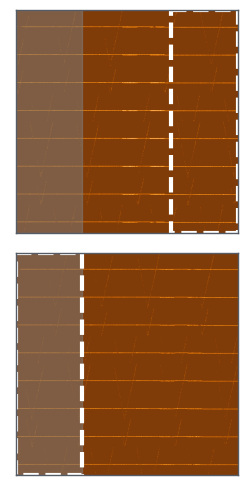

In [ ]:
colormap = 'PuOr'#'gnuplot'#'RdBu'#'BrBG'#'PRGn' #'PiYG'
plt.style.use('seaborn-v0_8-deep')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = ['Helvetica']
Fontsize = 10
plt.rcParams['font.size'] = Fontsize

plt.rcParams['axes.facecolor'] = 'white'  
plt.rcParams['text.color'] = 'black'  
plt.rcParams['axes.labelcolor'] = 'black'  
plt.rcParams['xtick.color'] = 'black' 
plt.rcParams['ytick.color'] = 'black'  
plt.rcParams['axes.edgecolor'] = '#555c65'  
plt.rcParams['axes.linewidth'] = 1.0
plt.rcParams['legend.handlelength'] = 0.7
plt.rcParams['legend.handleheight'] = 0.7
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['ytick.major.width'] = 1

rectangle_width = int(0.3 * full_numpy_array.shape[0])
rectangle_height = full_numpy_array.shape[1]
rectangle_coords = [0, 0, rectangle_width, rectangle_height]



rectangle3 = patches.Rectangle((rectangle_coords[0], rectangle_coords[1]),
                              rectangle_coords[2], rectangle_coords[3],
                              linewidth=1, edgecolor='gray', facecolor='gray', alpha=0.5)
rectangle6 = patches.Rectangle((rectangle_coords[0], rectangle_coords[1]),
                              rectangle_coords[2], rectangle_coords[3],
                              linewidth=1, edgecolor='gray', facecolor='gray', alpha=0.5)


rectangle_coords_end = [int(0.7 * full_numpy_array.shape[0]), 0, rectangle_width, rectangle_height]

rectangle3_dashed = patches.Rectangle((rectangle_coords_end[0], rectangle_coords_end[1]),
                              rectangle_coords_end[2], rectangle_coords_end[3],
                             linestyle='dashed', edgecolor='white', facecolor='none', linewidth=3)
rectangle6_dashed = patches.Rectangle((rectangle_coords[0], rectangle_coords[1]),
                              rectangle_coords[2], rectangle_coords[3],
                              linestyle='dashed', edgecolor='white', facecolor='none', linewidth=3)



figure, ((ax3),(ax6)) = plt.subplots(2,1, figsize=(7, 5))


ax3.imshow(fake_img_1, cmap = colormap)
# ax3.axis('off')
# ax3.set_title('Fake miss map')
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_xticklabels([])
ax3.set_yticklabels([])
ax3.spines['top'].set_visible(True)
ax3.spines['right'].set_visible(True)
ax3.spines['bottom'].set_visible(True)
ax3.spines['left'].set_visible(True)
ax3.add_patch(rectangle3)
ax3.add_patch(rectangle3_dashed)


ax6.imshow(fake_img_2, cmap = colormap)
# ax6.axis('off')
# ax6.set_title('Fake miss map')
ax6.set_xticks([])
ax6.set_yticks([])
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.spines['top'].set_visible(True)
ax6.spines['right'].set_visible(True)
ax6.spines['bottom'].set_visible(True)
ax6.spines['left'].set_visible(True)
ax6.add_patch(rectangle6)
ax6.add_patch(rectangle6_dashed)


plt.tight_layout()
plt.savefig("Graphs/heatmap_2x1_fakemiss_withoverlapbox", dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

## Real Full And Real Miss Heatmap

In [ ]:
real_folder = '/tank/projects/neuralcachesim/sparse-matrices/size1/64set-12way_sparse/Poly10/TESTALL/'
# fake_folder = '/tank/projects/neuralcachesim/fakeB/'

n_lst = ['500' ] #['2789']#
# exp = 'Poly10GenLossLambda150Ngf128Scalingby2'
bench = 'fdtd_2d.'#'ludcmp.'#

In [ ]:
i = 1
for n in n_lst:
    full_sparse_mat = (sp.load_npz(real_folder + 'FULL/' + bench + '/'+ bench +'trace.champsim.gz.txt_'+ n +'_A.npz'))
    real_sparse_mat = (sp.load_npz(real_folder + 'MISS/' + bench + '/'+ bench +'trace.champsim.gz.txt_'+n +'_B.npz'))
    # fake_sparse_mat = (sp.load_npz(fake_folder + exp + '/1-64-12/' + bench + '/'+ bench[1:] +'trace.champsim.gz.txt_'+n +'_fakeB.npz'))


    full_numpy_array = np.array(full_sparse_mat.toarray(), dtype = np.uint8)
    real_numpy_array = np.array(real_sparse_mat.toarray(), dtype = np.uint8)
    # fake_numpy_array = np.array(fake_sparse_mat.toarray(), dtype = np.uint8)

    globals()[f'full_img_{i}'] = Image.fromarray(full_numpy_array, mode='L')
    globals()[f'real_img_{i}'] = Image.fromarray(real_numpy_array, mode='L')
    # globals()[f'fake_img_{i}'] = Image.fromarray(fake_numpy_array, mode='L')

    i = i+1

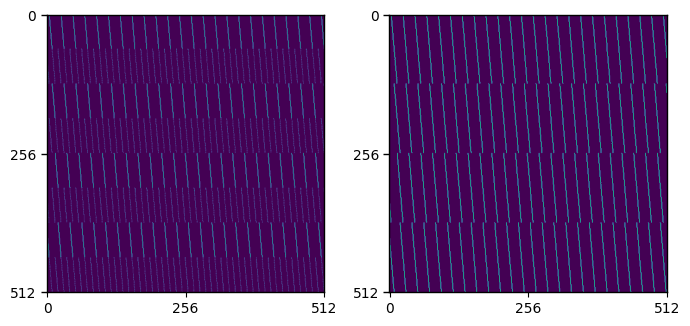

In [ ]:

plt.style.use('default')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = ['Helvetica']
Fontsize = 10
plt.rcParams['font.size'] = Fontsize

plt.rcParams['axes.facecolor'] = 'white'  
plt.rcParams['text.color'] = 'black'  
plt.rcParams['axes.labelcolor'] = 'black'  
plt.rcParams['xtick.color'] = 'black' 
plt.rcParams['ytick.color'] = 'black'  
plt.rcParams['axes.edgecolor'] = 'black'  
plt.rcParams['axes.linewidth'] = 1.0
plt.rcParams['legend.handlelength'] = 0.7
plt.rcParams['legend.handleheight'] = 0.7
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['ytick.major.width'] = 1

stepval = 256

figure, (ax1, ax2) = plt.subplots(1,2, figsize=(7, 5))


ax1.imshow(full_img_1)
# ax1.axis('off')
# ax1.set_title('Real full map')
ax1.set_xticks(ticks = np.arange(0, 513, step=stepval))
ax1.set_yticks(ticks = np.arange(0, 513, step=stepval))


ax2.imshow(real_img_1)
# ax2.axis('off')
# ax2.set_title('Real miss map')
ax2.set_xticks(ticks = np.arange(0, 513, step=stepval))
ax2.set_yticks(ticks = np.arange(0, 513, step=stepval))


plt.tight_layout()
plt.savefig("Graphs/heatmap_1x2_realfull_realmiss", dpi=300, bbox_inches='tight')
plt.show()

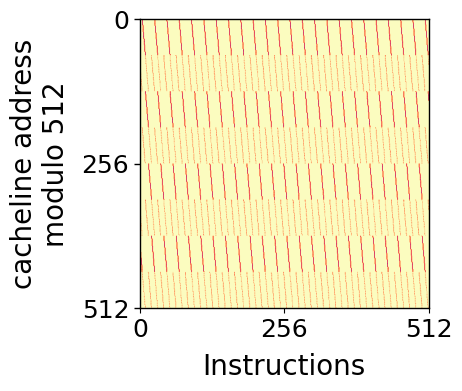

In [ ]:
colormap = 'magma_r' #'PuOr'#
plt.style.use('seaborn-v0_8-deep')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = ['Helvetica']
Fontsize = 20
plt.rcParams['font.size'] = Fontsize

plt.rcParams['axes.facecolor'] = 'white'  
plt.rcParams['text.color'] = 'black'  
plt.rcParams['axes.labelcolor'] = 'black'  
plt.rcParams['xtick.color'] = 'black' 
plt.rcParams['ytick.color'] = 'black'  
plt.rcParams['axes.edgecolor'] = 'black'  
plt.rcParams['axes.linewidth'] = 1.0
plt.rcParams['legend.handlelength'] = 0.7
plt.rcParams['legend.handleheight'] = 0.7
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['ytick.major.width'] = 1

stepval = 256

figure, (ax1) = plt.subplots(1,1, figsize=(5, 5))
figure.patch.set_facecolor("white")


ax1.imshow(full_img_1, cmap=colormap)
# ax1.axis('off')
# ax1.set_title('Real full map')
ax1.set_xticks(ticks = np.arange(0, 513, step=stepval))
ax1.set_yticks(ticks = np.arange(0, 513, step=stepval))
plt.xticks(fontsize=Fontsize-2)
plt.yticks(fontsize=Fontsize-2)
plt.ylabel('cacheline address\nmodulo 512',labelpad=8)
plt.xlabel('Instructions',labelpad=8)
plt.tight_layout()
plt.savefig("Graphs/heatmap_1x1_realfull", dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

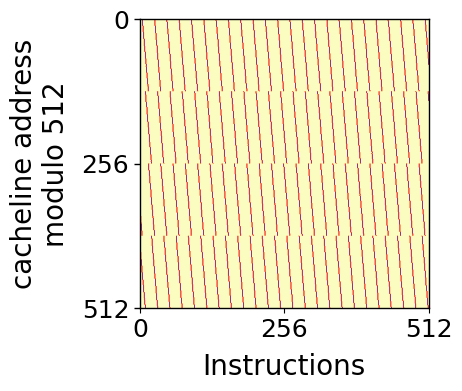

In [ ]:
colormap = 'magma_r' 
plt.style.use('seaborn-v0_8-deep')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = ['Helvetica']
Fontsize = 20
plt.rcParams['font.size'] = Fontsize

plt.rcParams['axes.facecolor'] = 'white'  
plt.rcParams['text.color'] = 'black'  
plt.rcParams['axes.labelcolor'] = 'black'  
plt.rcParams['xtick.color'] = 'black' 
plt.rcParams['ytick.color'] = 'black'  
plt.rcParams['axes.edgecolor'] = 'black'  
plt.rcParams['axes.linewidth'] = 1.0
plt.rcParams['legend.handlelength'] = 0.7
plt.rcParams['legend.handleheight'] = 0.7
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['ytick.major.width'] = 1

stepval = 256

figure, ( ax2) = plt.subplots(1,1, figsize=(5, 5))

ax2.imshow(real_img_1, cmap=colormap)
# ax2.axis('off')
# ax2.set_title('Real miss map')
ax2.set_xticks(ticks = np.arange(0, 513, step=stepval))
ax2.set_yticks(ticks = np.arange(0, 513, step=stepval))
plt.xticks(fontsize=Fontsize-2)
plt.yticks(fontsize=Fontsize-2)
plt.ylabel('cacheline address\nmodulo 512',labelpad=8)
plt.xlabel('Instructions',labelpad=8)

plt.tight_layout()  
plt.savefig("Graphs/heatmap_1x1_realmiss", dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

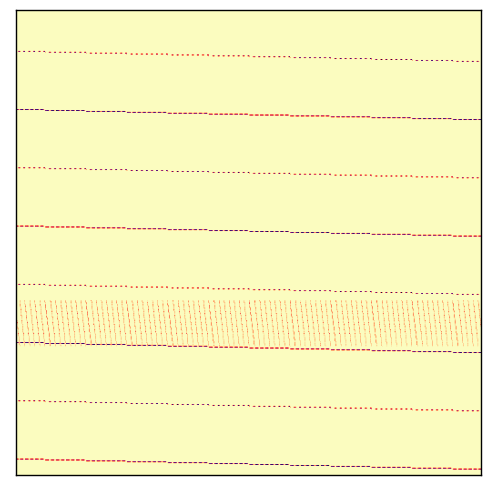

In [ ]:
colormap = 'magma_r' #'PuOr'#
plt.style.use('seaborn-v0_8-deep')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = ['Helvetica']
Fontsize = 10
plt.rcParams['font.size'] = Fontsize

plt.rcParams['axes.facecolor'] = 'white'  
plt.rcParams['text.color'] = 'black'  
plt.rcParams['axes.labelcolor'] = 'black'  
plt.rcParams['xtick.color'] = 'black' 
plt.rcParams['ytick.color'] = 'black'  
plt.rcParams['axes.edgecolor'] = 'black'  
plt.rcParams['axes.linewidth'] = 1.0
plt.rcParams['legend.handlelength'] = 0.7
plt.rcParams['legend.handleheight'] = 0.7
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['ytick.major.width'] = 1

stepval = 256

figure, (ax1) = plt.subplots(1,1, figsize=(5, 5))
figure.patch.set_facecolor("white")


ax1.imshow(full_img_1, cmap=colormap)
# ax1.axis('off')
# ax1.set_title('Real full map')

ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.spines['top'].set_visible(True)
ax1.spines['right'].set_visible(True)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)

plt.tight_layout()
plt.savefig("Graphs/heatmap_1x1_realfull_small", dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

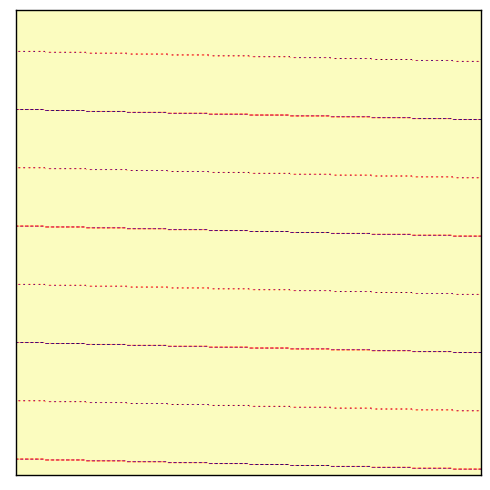

In [ ]:
colormap = 'magma_r' 
plt.style.use('seaborn-v0_8-deep')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = ['Helvetica']
Fontsize = 10
plt.rcParams['font.size'] = Fontsize

plt.rcParams['axes.facecolor'] = 'white'  
plt.rcParams['text.color'] = 'black'  
plt.rcParams['axes.labelcolor'] = 'black'  
plt.rcParams['xtick.color'] = 'black' 
plt.rcParams['ytick.color'] = 'black'  
plt.rcParams['axes.edgecolor'] = 'black'  
plt.rcParams['axes.linewidth'] = 1.0
plt.rcParams['legend.handlelength'] = 0.7
plt.rcParams['legend.handleheight'] = 0.7
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['ytick.major.width'] = 1

stepval = 256

figure, ( ax2) = plt.subplots(1,1, figsize=(5, 5))

ax2.imshow(real_img_1, cmap=colormap)
# ax2.axis('off')
# ax2.set_title('Real miss map')

ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.spines['top'].set_visible(True)
ax2.spines['right'].set_visible(True)
ax2.spines['bottom'].set_visible(True)
ax2.spines['left'].set_visible(True)


plt.tight_layout()
plt.savefig("Graphs/heatmap_1x1_realmiss_small", dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

